<a href="https://colab.research.google.com/github/prabuelangovan/prabuelangovan/blob/main/Instagram_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Instagram visits clustering.csv to Instagram visits clustering.csv


In [ ]:
df1 = pd.read_csv('Instagram visits clustering.csv')
df1

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
...,...,...,...
2595,2595,25,25.745908
2596,2596,52,9.275066
2597,2597,100,84.999487
2598,2598,87,20.530806


In [ ]:
df=df1.sample(500)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1461 to 964
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  500 non-null    int64  
 1   Instagram visit score    500 non-null    int64  
 2   Spending_rank(0 to 100)  500 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 15.6 KB


In [ ]:
df.describe()

,User ID,Instagram visit score,Spending_rank(0 to 100)
count,500.000000,500.000000,500.000000
mean,1317.594000,63.302000,44.286391
std,745.234289,26.121322,28.997651
min,1.000000,7.000000,3.547375
25%,660.250000,38.750000,20.516278
50%,1349.000000,72.000000,28.953900
75%,1941.000000,85.000000,73.996808
max,2593.000000,109.000000,104.929548


In [ ]:
df.isnull().sum()

User ID                    0
Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

In [ ]:
df.corr()

,User ID,Instagram visit score,Spending_rank(0 to 100)
User ID,1.000000,0.035897,0.116456
Instagram visit score,0.035897,1.000000,0.047703
Spending_rank(0 to 100),0.116456,0.047703,1.000000


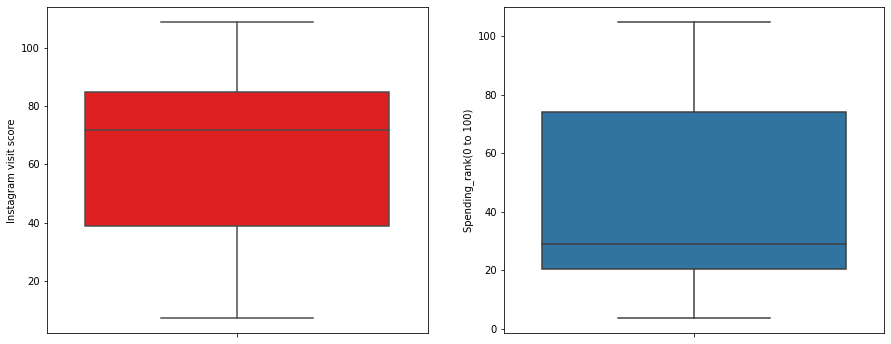

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Instagram visit score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Spending_rank(0 to 100)"])
plt.show()


In [ ]:
df = df.drop(columns=['User ID'],axis=1)

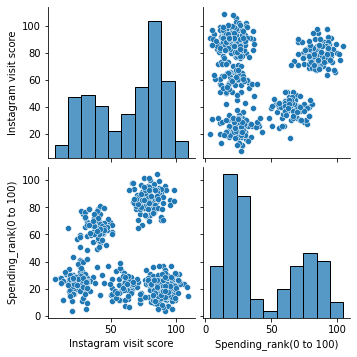

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = df[['Instagram visit score','Spending_rank(0 to 100)']].values
x

array([[ 87.        ,  16.71144156],
       [ 24.        ,  19.89866347],
       [ 71.        ,  80.72973996],
       [ 40.        ,  78.77810516],
       [ 84.        ,  85.71251997],
       [ 87.        ,  18.46994096],
       [ 39.        ,  71.6091871 ],
       [ 51.        ,  61.8967813 ],
       [ 32.        ,  69.46708965],
       [ 40.        ,  78.51086906],
       [ 88.        ,  21.18988948],
       [ 26.        ,  40.99115058],
       [ 74.        ,  81.15390938],
       [ 93.        ,  12.91347352],
       [ 83.        ,   9.11496126],
       [ 91.        ,  14.15057563],
       [ 72.        ,   9.63691243],
       [ 41.        ,  73.92483537],
       [ 95.        ,  85.71835635],
       [ 39.        ,  67.0075317 ],
       [ 21.        ,  25.13109369],
       [ 91.        ,  13.1151177 ],
       [ 20.        ,  10.86560616],
       [ 44.        ,  60.6765901 ],
       [ 58.        ,  33.45836604],
       [ 18.        ,  26.44565387],
       [ 60.        ,  31.82224229],
 

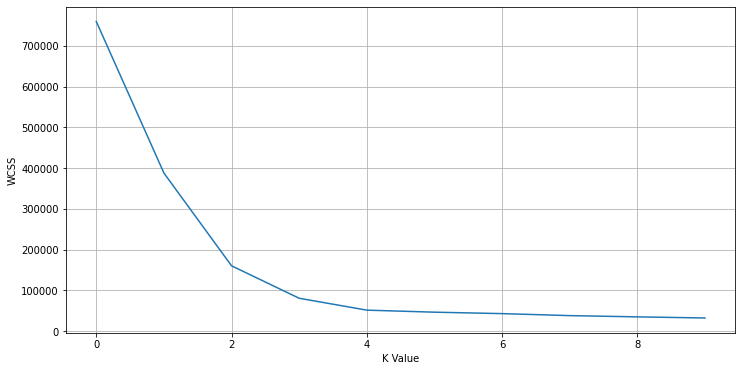

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(wcss)
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
model = (KMeans(n_clusters = 5) )
model.fit(x)
model

KMeans(n_clusters=5)

In [ ]:
labels2 = model.labels_
centroids2 = model.cluster_centers_

In [ ]:
print(labels2)

[4 3 1 2 1 4 2 2 2 2 4 3 1 4 4 4 0 2 1 2 3 4 3 2 0 3 0 2 4 2 0 4 3 3 3 0 2
 0 3 2 4 0 3 1 4 2 1 4 2 0 1 2 3 1 4 4 0 0 2 1 4 4 3 2 2 3 3 1 0 1 1 0 3 4
 4 3 2 3 0 4 2 4 1 1 1 4 0 2 3 1 4 4 3 3 3 1 4 3 3 0 3 1 1 3 4 2 3 1 3 4 4
 1 1 1 1 4 1 1 4 1 3 4 1 4 4 1 1 1 0 4 3 1 4 4 2 4 1 4 4 3 1 1 3 2 4 1 0 1
 3 4 1 2 4 3 1 1 2 1 4 4 3 4 3 4 1 2 1 4 4 3 1 1 4 3 3 4 0 4 2 2 1 1 4 1 1
 4 1 1 3 4 3 4 0 3 1 1 2 1 4 2 2 4 1 2 4 4 4 3 1 4 3 1 4 4 0 3 4 4 1 2 0 3
 0 0 0 2 0 4 4 4 2 3 4 3 3 3 1 4 2 4 3 0 1 0 3 3 3 4 1 4 4 4 4 2 1 0 4 1 4
 1 0 4 1 4 1 4 2 4 3 0 1 1 4 3 1 2 4 0 0 0 4 1 2 1 0 4 1 3 2 4 0 0 2 4 0 1
 1 1 3 1 1 4 4 3 4 4 4 1 4 3 4 2 0 3 1 4 1 2 1 4 1 1 3 4 3 2 4 3 3 4 3 4 3
 1 2 4 3 1 4 2 1 4 2 1 2 4 3 4 4 1 4 4 1 3 2 3 4 2 0 1 3 4 1 3 2 0 1 2 4 2
 2 1 4 2 4 3 4 4 0 4 1 0 3 2 1 2 4 3 4 0 1 2 1 4 4 2 0 1 4 1 4 2 3 3 2 1 4
 3 1 3 0 0 1 3 2 4 0 2 4 2 1 0 0 4 4 4 2 2 2 1 2 2 1 4 4 4 1 0 0 3 0 3 0 3
 0 1 1 4 2 4 2 1 1 4 4 1 3 3 4 4 4 4 2 2 2 4 1 3 1 0 2 3 4 1 4 3 4 1 3 0 3
 3 4 2 2 1 4 0 3 4 1 2 0 

In [ ]:
print(centroids2)

[[60.37288136 21.04797992]
 [79.45454545 85.30056806]
 [38.5125     65.83463518]
 [24.40217391 25.27394633]
 [88.84459459 20.18933788]]


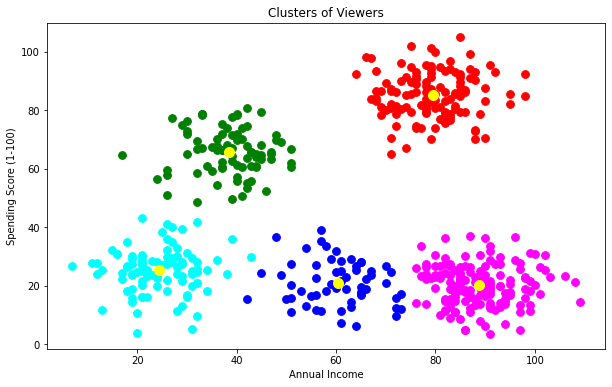

In [ ]:
df['label'] = labels2 
plt.figure(figsize=(10,6))
plt.scatter(df["Instagram visit score"][df.label == 0], df["Spending_rank(0 to 100)"][df.label == 0], c='blue', s=60)
plt.scatter(df["Instagram visit score"][df.label == 1], df["Spending_rank(0 to 100)"][df.label == 1], c='red', s=60)
plt.scatter(df["Instagram visit score"][df.label == 2], df["Spending_rank(0 to 100)"][df.label == 2], c='green', s=60)
plt.scatter(df["Instagram visit score"][df.label == 3], df["Spending_rank(0 to 100)"][df.label == 3], c='cyan', s=60)
plt.scatter(df["Instagram visit score"][df.label == 4], df["Spending_rank(0 to 100)"][df.label == 4], c='magenta', s=60)
plt.scatter(df["Instagram visit score"][df.label == 5], df["Spending_rank(0 to 100)"][df.label == 5], c='pink', s=60)
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=100, c='yellow', label='Centroids' )
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.title('Clusters of Viewers')
plt.show()

In [ ]:
print (metrics.silhouette_score(x,kmeans.labels_,metric='euclidean'))

0.34246336468131017
